In [ ]:
%pip install matplotlib
%pip install control

## 4.5

### Controle da Resposta Transitória

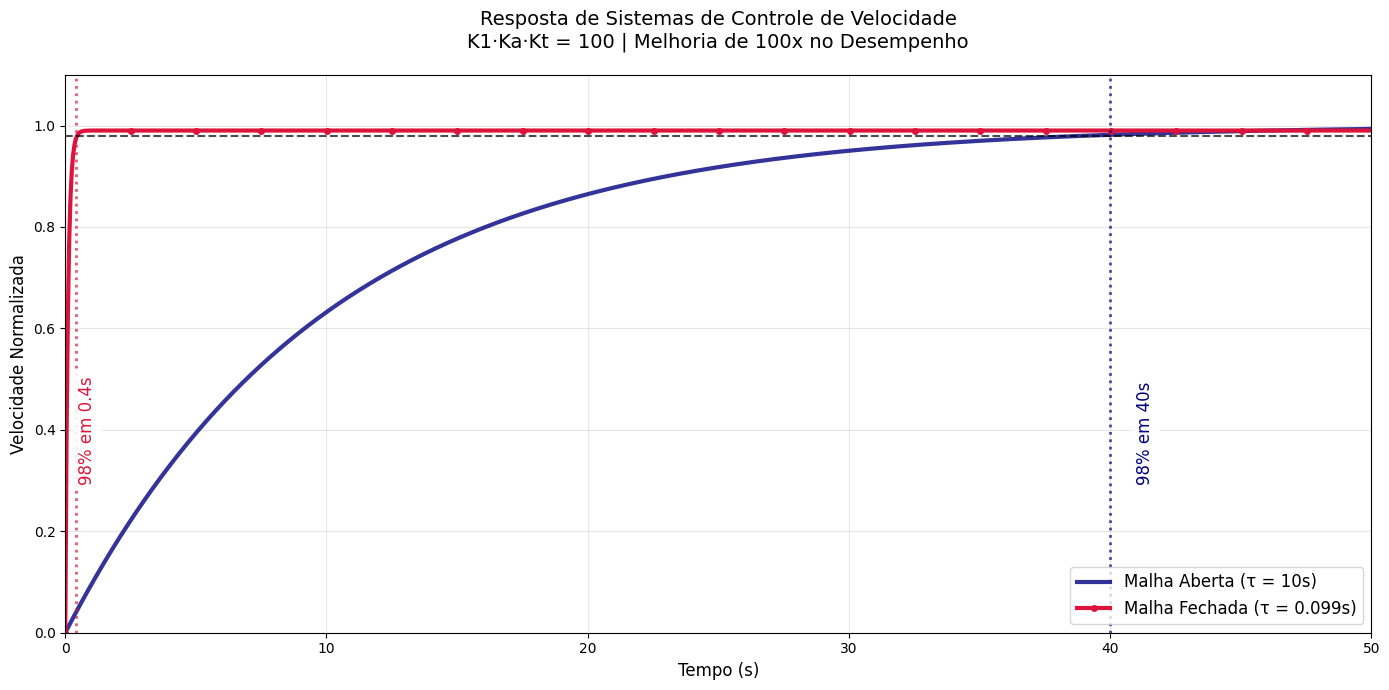

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

tau_open = 10 
K1KaKt = 100  
tau_closed = tau_open / (1 + K1KaKt)  

sys_open = ct.TransferFunction([1], [tau_open, 1])  
sys_closed = ct.TransferFunction([K1KaKt], [tau_open, 1 + K1KaKt])  

t_open, y_open = ct.step_response(sys_open, T=np.linspace(0, 50, 1000))

t_closed, y_closed = ct.step_response(sys_closed, T=np.linspace(0, 50, 1000))

plt.figure(figsize=(14, 7))

plt.plot(t_open, y_open, label=f'Malha Aberta (τ = {tau_open}s)', 
         color='navy', linewidth=3, alpha=0.8)
plt.plot(t_closed, y_closed, label=f'Malha Fechada (τ = {tau_closed:.3f}s)', 
         color='crimson', linewidth=3, linestyle='-', marker='o', markersize=4, markevery=50)

plt.axhline(0.98, color='black', linestyle='--', alpha=0.7, linewidth=1.5)
plt.axvline(x=40, color='navy', linestyle=':', linewidth=2, alpha=0.7)
plt.axvline(x=0.4, color='crimson', linestyle=':', linewidth=2, alpha=0.7)

plt.text(41, 0.3, '98% em 40s', color='navy', rotation=90, fontsize=12,
         bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
plt.text(0.5, 0.3, '98% em 0.4s', color='crimson', rotation=90, fontsize=12,
         bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))

plt.title('Resposta de Sistemas de Controle de Velocidade\n'
         f'K1·Ka·Kt = {K1KaKt} | Melhoria de 100x no Desempenho', pad=20, fontsize=14)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Velocidade Normalizada', fontsize=12)
plt.legend(fontsize=12, loc='lower right')
plt.grid(True, alpha=0.3)
plt.xlim(0, 50)
plt.ylim(0, 1.1)

plt.tight_layout()
plt.show()

## 4.8


### Controle da Máquina de Perfuração do Canal da Mancha

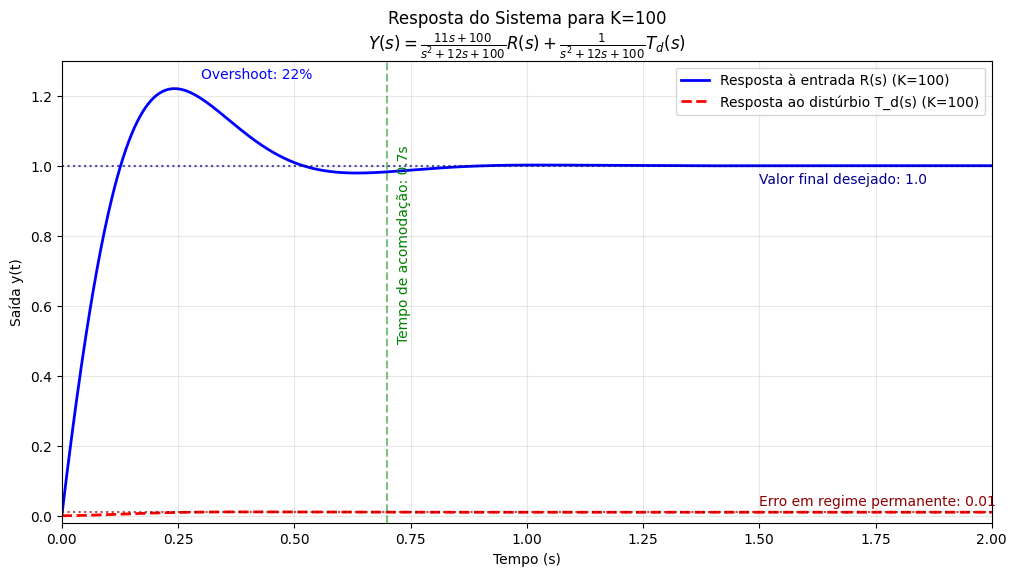

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

# Parâmetros do sistema
K = 100
num_R = [11, K]  # Numerador para R(s): 11s + K
num_Td = [1]      # Numerador para T_d(s): 1
den = [1, 12, K]  # Denominador: s² + 12s + K

# Criar sistemas
sys_R = ct.TransferFunction(num_R, den)
sys_Td = ct.TransferFunction(num_Td, den)

# Tempo de simulação (0 a 2 segundos)
t = np.linspace(0, 2, 1000)

# Calcular respostas ao degrau
t_R, y_R = ct.step_response(sys_R, T=t)
t_Td, y_Td = ct.step_response(sys_Td, T=t)

# Plotagem
plt.figure(figsize=(12, 6))
plt.plot(t_R, y_R, label='Resposta à entrada R(s) (K=100)', color='blue', linewidth=2)
plt.plot(t_Td, y_Td, '--', label='Resposta ao distúrbio T_d(s) (K=100)', color='red', linewidth=2)

# Linhas de referência
plt.axhline(1.0, color='darkblue', linestyle=':', alpha=0.7)
plt.axhline(0.01, color='darkred', linestyle=':', alpha=0.7)
plt.axvline(0.7, color='green', linestyle='--', alpha=0.5)

# Anotações
plt.text(1.5, 0.95, 'Valor final desejado: 1.0', color='darkblue')
plt.text(1.5, 0.03, 'Erro em regime permanente: 0.01', color='darkred')
plt.text(0.72, 0.5, 'Tempo de acomodação: 0.7s', color='green', rotation=90)
plt.text(0.3, 1.25, 'Overshoot: 22%', color='blue')

# Configurações do gráfico
plt.title('Resposta do Sistema para K=100\n'
          r'$Y(s) = \frac{11s+100}{s^2+12s+100}R(s) + \frac{1}{s^2+12s+100}T_d(s)$')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 2)
plt.ylim(-0.02, 1.3)

plt.show()

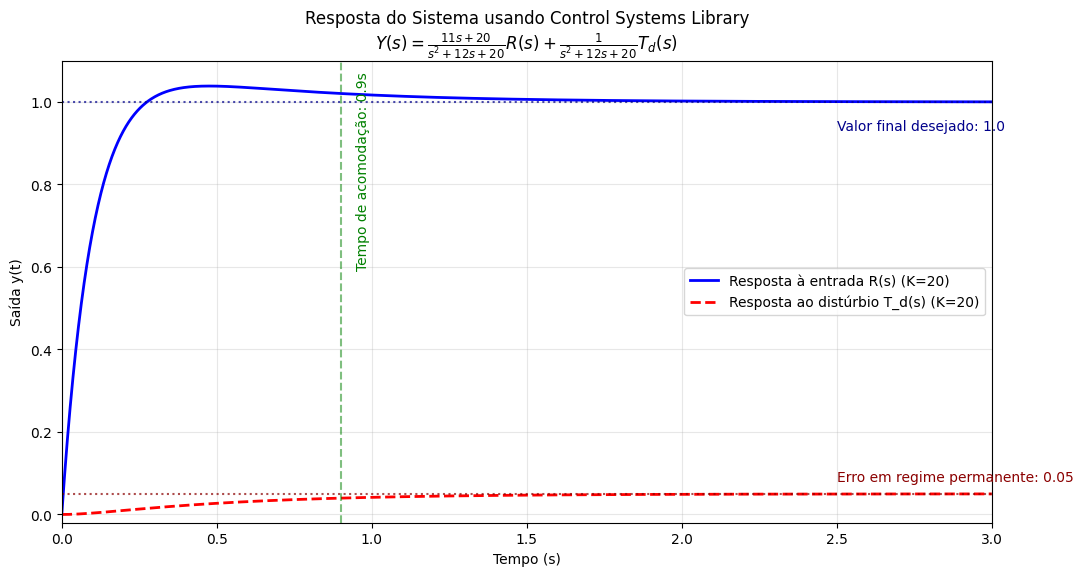

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

K = 20
num_R = [11, K]  
num_Td = [1]     
den = [1, 12, K] 

sys_R = ct.TransferFunction(num_R, den)
sys_Td = ct.TransferFunction(num_Td, den)

t = np.linspace(0, 3, 1000)

t_R, y_R = ct.step_response(sys_R, T=t)
t_Td, y_Td = ct.step_response(sys_Td, T=t)

plt.figure(figsize=(12, 6))
plt.plot(t_R, y_R, label='Resposta à entrada R(s) (K=20)', color='blue', linewidth=2)
plt.plot(t_Td, y_Td, '--', label='Resposta ao distúrbio T_d(s) (K=20)', color='red', linewidth=2)

plt.axhline(1.0, color='darkblue', linestyle=':', alpha=0.7)
plt.axhline(0.05, color='darkred', linestyle=':', alpha=0.7)
plt.axvline(0.9, color='green', linestyle='--', alpha=0.5)

plt.text(2.5, 0.93, 'Valor final desejado: 1.0', color='darkblue')
plt.text(2.5, 0.08, 'Erro em regime permanente: 0.05', color='darkred')
plt.text(0.95, 0.6, 'Tempo de acomodação: 0.9s', color='green', rotation=90)

plt.title('Resposta do Sistema usando Control Systems Library\n'
         r'$Y(s) = \frac{11s+20}{s^2+12s+20}R(s) + \frac{1}{s^2+12s+20}T_d(s)$')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 3)
plt.ylim(-0.02, 1.1)

plt.show()

### Controle da Pressão Arterial Durante Anestesia

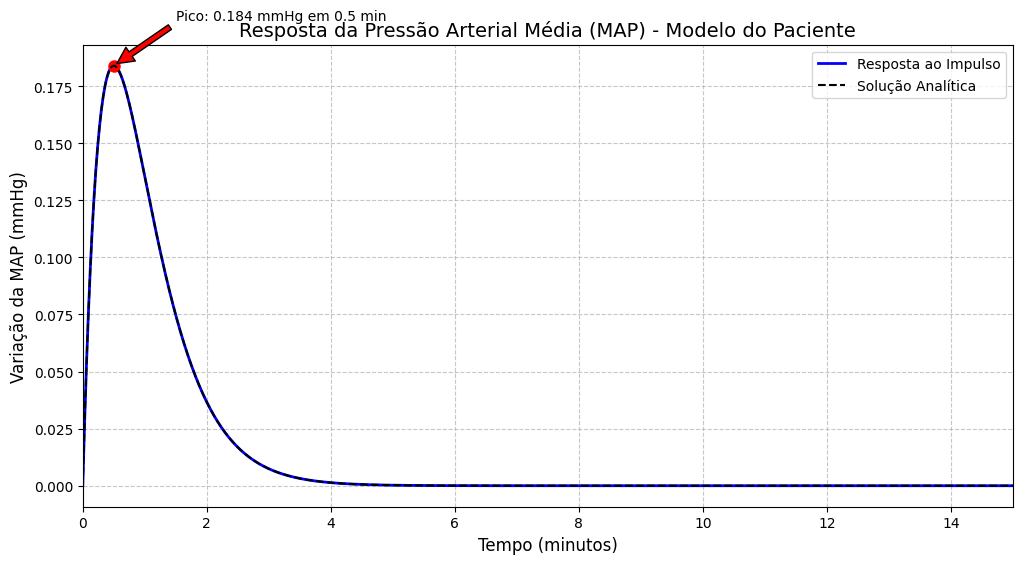

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

p = 2  
t_final = 15  

num = [1]  
den = [1, 2*p, p**2] 
sys_patient = ct.TransferFunction(num, den)

t_imp, y_imp = ct.impulse_response(sys_patient, T=np.linspace(0, t_final, 1000))

plt.figure(figsize=(12, 6))

plt.plot(t_imp, y_imp, 'b-', linewidth=2, label='Resposta ao Impulso')
plt.title('Resposta da Pressão Arterial Média (MAP) - Modelo do Paciente', fontsize=14)
plt.xlabel('Tempo (minutos)', fontsize=12)
plt.ylabel('Variação da MAP (mmHg)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

peak_time = 1/p
peak_value = (1/p)*np.exp(-1)
plt.plot(peak_time, peak_value, 'ro', markersize=8)
plt.annotate(f'Pico: {peak_value:.3f} mmHg em {peak_time:.1f} min',
             xy=(peak_time, peak_value),
             xytext=(peak_time + 1, peak_value + 0.02),
             arrowprops=dict(facecolor='red', shrink=0.05))

t_analytical = np.linspace(0, t_final, 1000)
y_analytical = t_analytical * np.exp(-p * t_analytical)
plt.plot(t_analytical, y_analytical, 'k--', linewidth=1.5, label='Solução Analítica')

plt.legend()
plt.xlim([0, t_final])
plt.show()


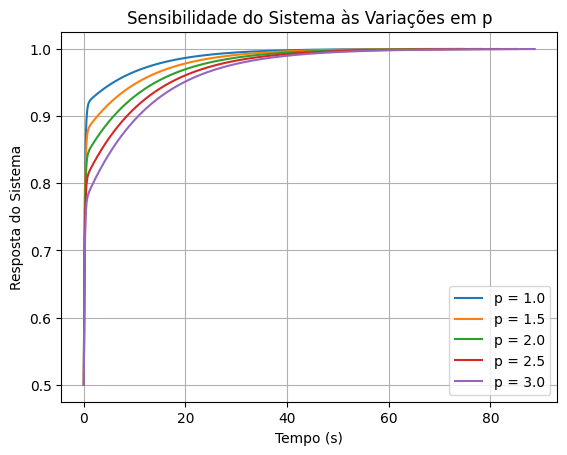

In [3]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Parâmetro inicial
p = 2

# Função de transferência do sistema: G(s) = 1 / (s + p)
G = ctrl.TransferFunction([1], [1, p])

# Controlador PID: Gc(s) = (Kd * s^2 + Kp * s + Ki) / s
Kp = 10
Ki = 1
Kd = 1
Gc = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

# Função de transferência em malha fechada
H = ctrl.TransferFunction([1], [1])
sistema_malha_fechada = ctrl.feedback(Gc * G, H)

# Sensibilidade ao parâmetro p
p_variations = np.linspace(1, 3, 5)  # Testando p de 1 a 3

plt.figure()
for p_var in p_variations:
    G_var = ctrl.TransferFunction([1], [1, p_var])
    sistema_malha_fechada_var = ctrl.feedback(Gc * G_var, H)
    time, response = ctrl.step_response(sistema_malha_fechada_var)
    plt.plot(time, response, label=f'p = {p_var:.1f}')

plt.title('Sensibilidade do Sistema às Variações em p')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta do Sistema')
plt.legend()
plt.grid(True)
plt.show()


## 4.9 

### Controle de Velocidade

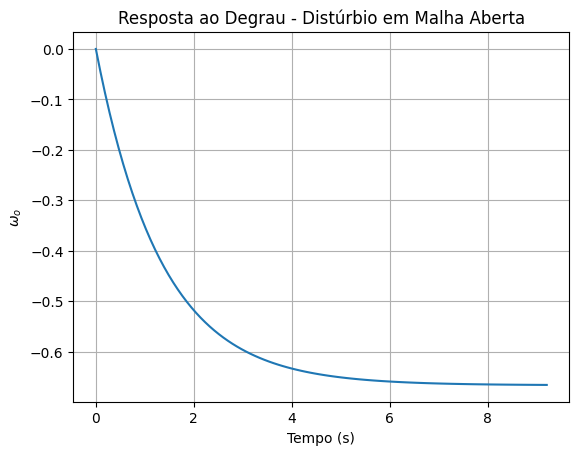

Valor em regime permanente: -0.666 rad/s


In [4]:
import control as ctrl
import matplotlib.pyplot as plt

Ra = 1   
Km = 10  
J = 2    
f = 0.5  
Kb = 0.1 

num1 = [1]
den1 = [J, f]
sys1 = ctrl.TransferFunction(num1, den1)

num2 = [Km * Kb / Ra]
den2 = [1]
sys2 = ctrl.TransferFunction(num2, den2)

sys_o = ctrl.feedback(sys1, sys2)

sys_o = -sys_o

T, yo = ctrl.step_response(sys_o)

plt.plot(T, yo)
plt.title('Resposta ao Degrau - Distúrbio em Malha Aberta')
plt.xlabel('Tempo (s)')
plt.ylabel(r'$\omega_o$')
plt.grid()
plt.show()

steady_state_value = yo[-1]
print(f"Valor em regime permanente: {steady_state_value:.3f} rad/s")

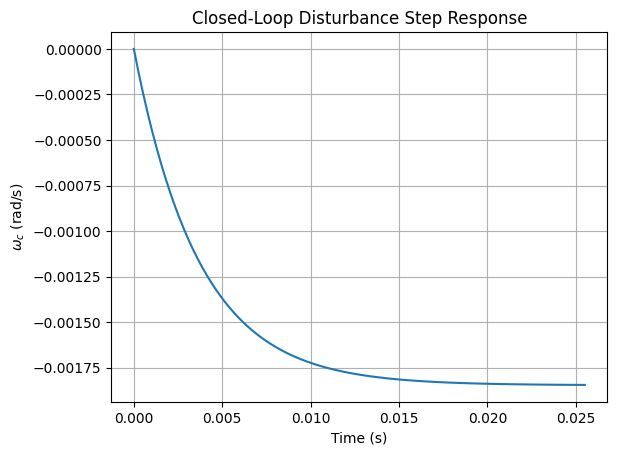

-0.0018448753462603877


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

Ra = 1
Km = 10
J = 2
b = 0.5
Kb = 0.1
Ka = 54
Kt = 1

num1 = [1]
den1 = [J, b]
sys1 = ctrl.TransferFunction(num1, den1)

num2 = [Ka * Kt]
den2 = [1]
sys2 = ctrl.TransferFunction(num2, den2)

num3 = [Kb]
den3 = [1]
sys3 = ctrl.TransferFunction(num3, den3)

num4 = [Km / Ra]
den4 = [1]
sys4 = ctrl.TransferFunction(num4, den4)

sysa = ctrl.parallel(sys2, sys3)
sysb = ctrl.series(sysa, sys4)

sys_c = ctrl.feedback(sys1, sysb)

sys_c = -sys_c

T, yc = ctrl.step_response(sys_c)

plt.plot(T, yc)
plt.title('Closed-Loop Disturbance Step Response')
plt.xlabel('Time (s)')
plt.ylabel('$\\omega_c$ (rad/s)')
plt.grid(True)
plt.show()

print(yc[-1])

### Controle do Canal da mancha

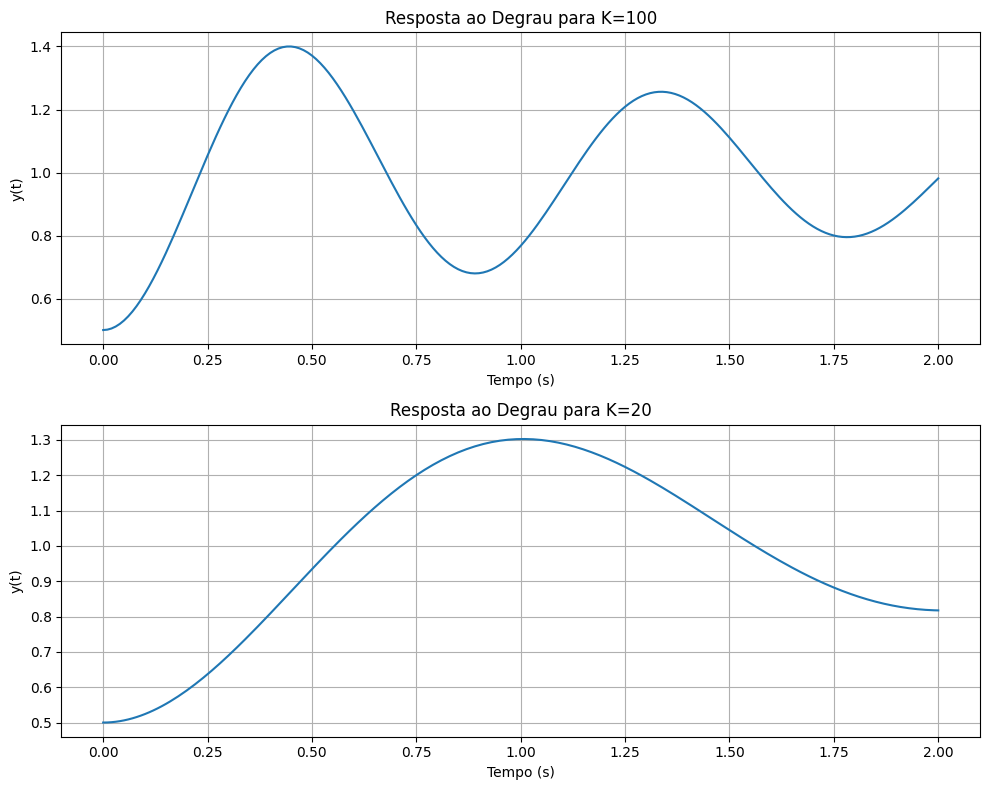

In [3]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

numg = [1]
deng = [1, 1, 0]
sysg = ct.TransferFunction(numg, deng)

K1 = 100
K2 = 20

num1 = [1, 1, K1]
num2 = [1, 1, K2]
den = [1]  

sys1 = ct.TransferFunction(num1, den)
sys2 = ct.TransferFunction(num2, den)

sysa = ct.series(sys1, sysg)
sysb = ct.TransferFunction(num2, den)

sysa = ct.series(sys1, sysg)
sysb = ct.series(sys2, sysg)

sysc = ct.feedback(sysa, 1)
sysd = ct.feedback(sysb, 1)

t = np.linspace(0, 2, 201)

t1, y1 = ct.step_response(sysc, T=t)
t2, y2 = ct.step_response(sysd, T=t)

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(t1, y1)
plt.title('Resposta ao Degrau para K=100')
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t2, y2)
plt.title('Resposta ao Degrau para K=20')
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.grid()

plt.tight_layout()
plt.show()

0 states have been removed from the model
0 states have been removed from the model


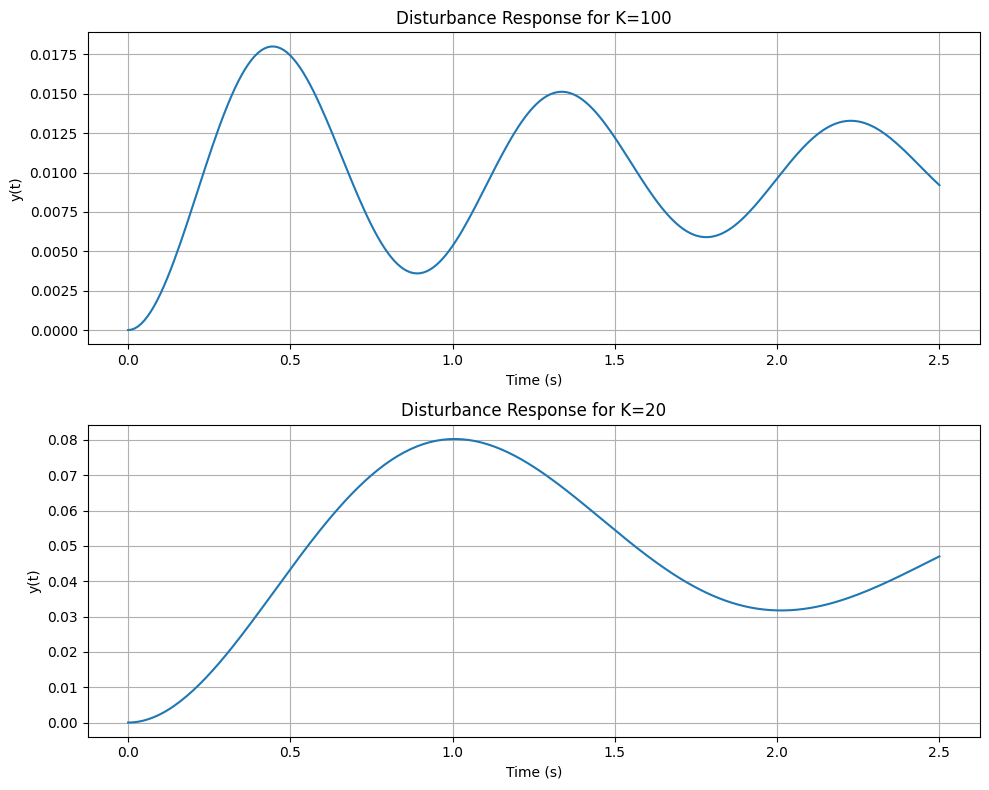

In [4]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

numg = [1]
deng = [1, 1, 0]
sysg = ct.TransferFunction(numg, deng)

K1 = 100
K2 = 20

num1 = [1, 1, K1]
num2 = [1, 1, K2]
den_controller = [0, 1]  

sys1 = ct.TransferFunction(num1, den_controller)
sys2 = ct.TransferFunction(num2, den_controller)

sysa = ct.feedback(sysg, sys1)
sysa = ct.minreal(sysa)  

sysb = ct.feedback(sysg, sys2)
sysb = ct.minreal(sysb)  

t = np.linspace(0, 2.5, 251) 

t1, y1 = ct.step_response(sysa, T=t)
t2, y2 = ct.step_response(sysb, T=t)

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(t1, y1)
plt.title('Disturbance Response for K=100')
plt.xlabel('Time (s)')
plt.ylabel('y(t)')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t2, y2)
plt.title('Disturbance Response for K=20')
plt.xlabel('Time (s)')
plt.ylabel('y(t)')
plt.grid()

plt.tight_layout()
plt.show()

## 4.10

0 states have been removed from the model
0 states have been removed from the model


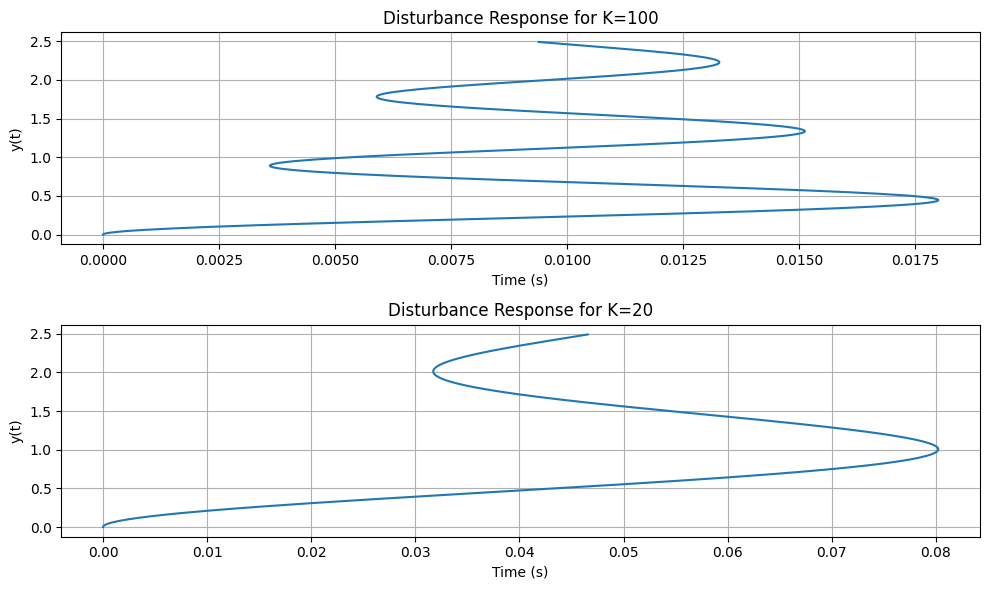

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

numg = [1]
deng = [1, 1, 0]
sysg = ctrl.TransferFunction(numg, deng)

K1 = 100
K2 = 20
num1 = [1, 1, K1]
num2 = [1, 1, K2]
den = [0, 1]

sys1 = ctrl.TransferFunction(num1, den)
sys2 = ctrl.TransferFunction(num2, den)

sysa = ctrl.feedback(sysg, sys1)
sysa = ctrl.minreal(sysa)
sysb = ctrl.feedback(sysg, sys2)
sysb = ctrl.minreal(sysb)

t = np.arange(0, 2.5, 0.01)

y1, t1 = ctrl.step_response(sysa, t)
y2, t2 = ctrl.step_response(sysb, t)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t1, y1)
plt.title('Disturbance Response for K=100')
plt.xlabel('Time (s)')
plt.ylabel('y(t)')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t2, y2)
plt.title('Disturbance Response for K=20')
plt.xlabel('Time (s)')
plt.ylabel('y(t)')
plt.grid()

plt.tight_layout()
plt.show()


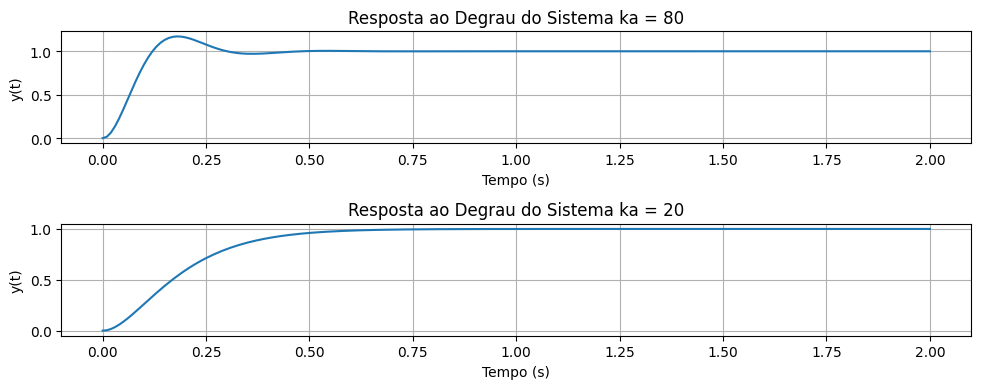

In [13]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

Ka = 80
Ka2 = 20

sysf = ct.TransferFunction([5000], [1, 1000]) 
sysg = ct.TransferFunction([1], [1, 20, 0])    

sysa = Ka * sysf * sysg

sys = ct.feedback(sysa, 1)

t = np.linspace(0, 2, 201)  

t, y = ct.step_response(sys, T=t)

sysa = Ka2 * sysf * sysg

sys = ct.feedback(sysa, 1)

t2 = np.linspace(0, 2, 201)  

t2, y2 = ct.step_response(sys, T=t2)

plt.figure(figsize=(10, 4))

plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema ka = 80')
plt.ylabel('y(t)')
plt.xlabel('Tempo (s)')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t2, y2)
plt.title('Resposta ao Degrau do Sistema ka = 20')
plt.ylabel('y(t)')
plt.xlabel('Tempo (s)')
plt.grid()

plt.tight_layout()
plt.show()

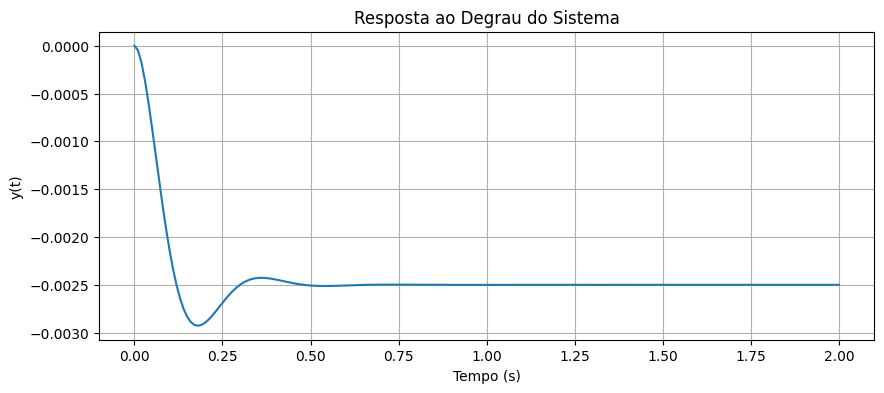

In [ ]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

Ka = 80

sysf = ct.TransferFunction([5000], [1, 1000])  
sysg = ct.TransferFunction([1], [1, 20, 0]) 

sys = ct.feedback(sysg, Ka * sysf)  
sys = -sys  

t = np.linspace(0, 2, 201)  

t, y = ct.step_response(sys, T=t)

plt.figure(figsize=(10, 4))
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema')
plt.ylabel('y(t)')
plt.xlabel('Tempo (s)')
plt.grid()
plt.show()